In [20]:
from OFDM import *
%matplotlib inline
plt.rcParams["figure.figsize"] = [12.0,8.0]

In [21]:
bits = load_file("gr5ch2.wav")

In [22]:
tx = transmitter(mode = "B2", encoding="XOR")

In [23]:
signal = tx.transmit(bits, graph_output=False)

------------------------------------------
TRANSMIT
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               704 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      180
Number of bits to transmit:         14590536
Number of OFDM symbols to transmit: 5220
Number of packets to transmit:      29


In [24]:
#r = play_record(signal, tx.fs)
sd.play(signal, tx.fs)

In [25]:
fs, r = wavfile.read("received_signals/gr5ch2_signal.wav")
r = r /1.01
#print(fs)
#r = signal

/Users/Adam/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  """Entry point for launching an IPython kernel.


In [26]:
rx = receiver(mode = "B2", encoding="XOR")

------------------------------------------
Receive 
------------------------------------------
OFDM Paramters:
Number of actual Sub Carriers:      2047 
Cyclic prefix length:               704 
Modulation method:                  QPSK 
Sync Method:                        chirp 
Packet Length:                      180


/Users/Adam/Documents/audio-modem/OFDM.py:416: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  rx = np.vstack((r[i:i + (2*self.no_pilots + self.packet_length) * (self.cp_length + self.ofdm_symbol_size)] for i in zero_indicies))


Number of received OFDM symbols:    5220
Number of received bits:            14616000


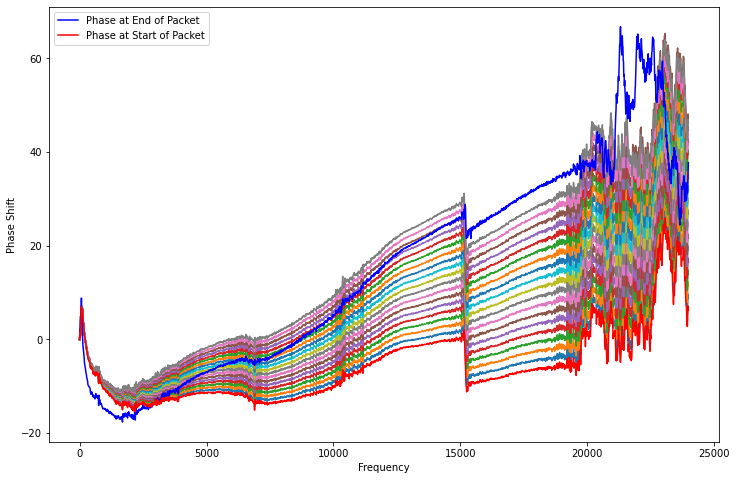

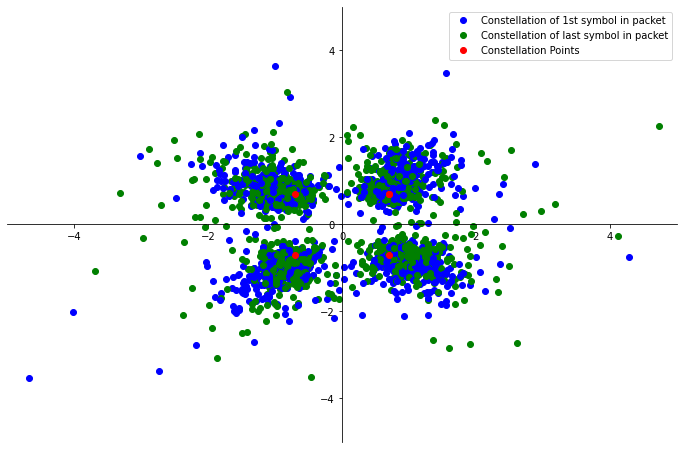

In [27]:
rx_bits, Hstart, Hend = rx.receive(r, graph_output=True)

In [28]:
errs = np.sum(abs(bits-rx_bits[:len(bits)]))
print("BER: {}".format(errs/len(bits)))
name, file = save_file(rx_bits)

BER: 0.011522332010283926
File Name: gr5ch2.wav
File Size: 1823798 bytes


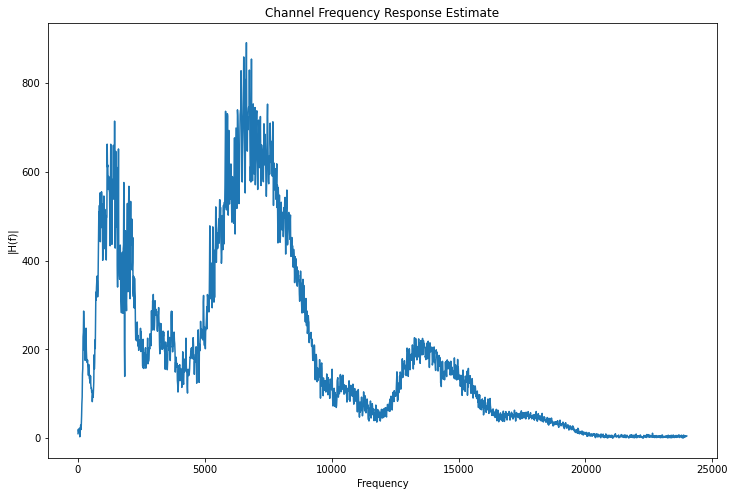

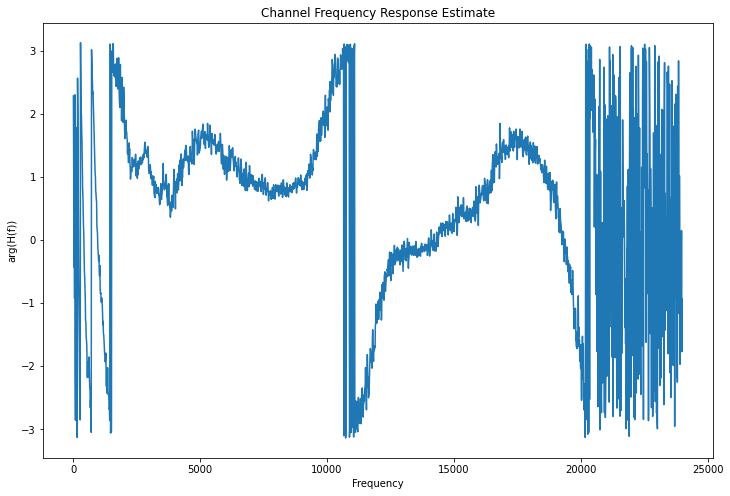

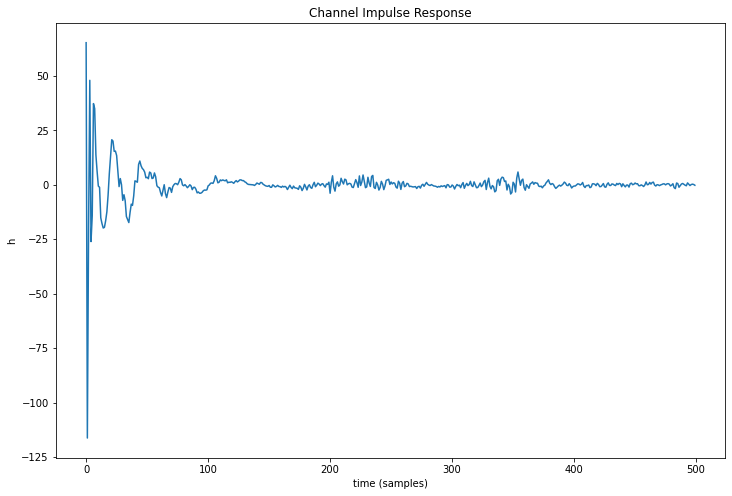

In [10]:
rx.channel_response(Hstart)

In [29]:
tx.data_bits_per_symbol

2800

In [6]:
x = [1,2,3,4,5,6]
sync = np.tile(x, (10,1))
sync[0]

array([1, 2, 3, 4, 5, 6])